As the climate changes, predicting the weather becomes ever more important for businesses. You have been asked to support on a machine learning project with the aim of building a pipeline to predict the climate in London, England. Specifically, the model should predict mean temperature in degrees Celsius (°C).

Since the weather depends on a lot of different factors, you will want to run a lot of experiments to determine what the best approach is to predict the weather. In this project, you will run experiments for different regression models predicting the mean temperature, using a combination of `sklearn` and `mlflow`.

You will be working with data stored in `london_weather.csv`, which contains the following columns:
- **date** - recorded date of measurement - (**int**)
- **cloud_cover** - cloud cover measurement in oktas - (**float**)
- **sunshine** - sunshine measurement in hours (hrs) - (**float**)
- **global_radiation** - irradiance measurement in Watt per square meter (W/m2) - (**float**)
- **max_temp** - maximum temperature recorded in degrees Celsius (°C) - (**float**)
- **mean_temp** - **target** mean temperature in degrees Celsius (°C) - (**float**)
- **min_temp** - minimum temperature recorded in degrees Celsius (°C) - (**float**)
- **precipitation** - precipitation measurement in millimeters (mm) - (**float**)
- **pressure** - pressure measurement in Pascals (Pa) - (**float**)
- **snow_depth** - snow depth measurement in centimeters (cm) - (**float**)

In [1]:
# Run this cell to install mlflow
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00


In [2]:
# Run this cell to import the modules you require
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [88]:
# Reading in the data
df = pd.read_csv("london_weather.csv")

In [89]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [90]:
# Determine the column names, data types, number of non-null vales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [91]:
# Convert columns to the correct data type to enable exploratory data analysis.
# NB:in the data I've downloaded date was int64 but it should have been object
# so I've converted it back and forth just for the sake of practice
df["date"] = df["date"].astype("object")

In [92]:
df["date"].dtypes

dtype('O')

In [93]:
df["date"] = pd.to_datetime(df["date"], format='%Y%m%d')

In [94]:
df.dtypes

date                datetime64[ns]
cloud_cover                float64
sunshine                   float64
global_radiation           float64
max_temp                   float64
mean_temp                  float64
min_temp                   float64
precipitation              float64
pressure                   float64
snow_depth                 float64
dtype: object

In [95]:
# extracting year and moth for further EDA
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

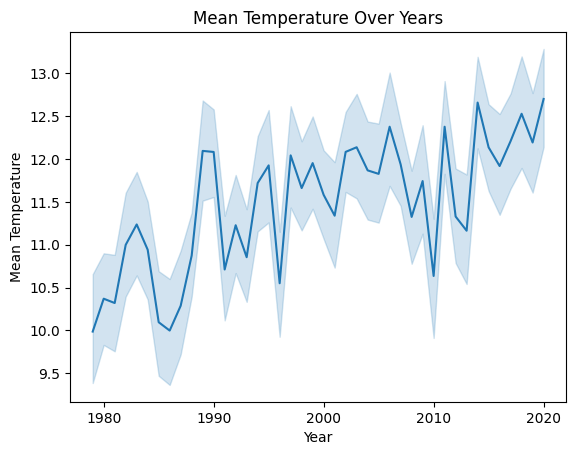

In [96]:
# mean temperature over years
sns.lineplot(x="year", y="mean_temp", data=df)
plt.title("Mean Temperature Over Years")
plt.xlabel("Year")
plt.ylabel("Mean Temperature")
plt.show()

From the lineplot we can see that temperature with years gets bigger

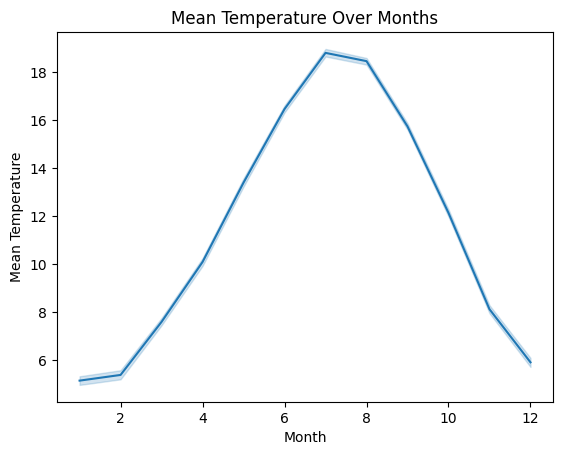

In [97]:
# mean years over months
sns.lineplot(x="month", y="mean_temp", data=df)
plt.title("Mean Temperature Over Months")
plt.xlabel("Month")
plt.ylabel("Mean Temperature")
plt.show()

As expected, the hottest months are in the summer

In [98]:
# looking at the feature correlation
correlation_matrix = df.corr()
correlation_matrix.style.background_gradient()

<ipython-input-98-34c6f38f5b1c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,year,month
cloud_cover,1.000000,-0.738291,-0.485973,-0.212224,-0.110556,0.048838,0.235269,-0.241955,-0.001256,-0.107003,-0.020270
sunshine,-0.738291,1.000000,0.852632,0.472182,0.396535,0.219082,-0.231636,0.226943,-0.034222,0.009163,-0.033842
global_radiation,-0.485973,0.852632,1.000000,0.690946,0.635432,0.478119,-0.162668,0.150078,-0.061781,0.008395,-0.092202
max_temp,-0.212224,0.472182,0.690946,1.000000,0.912200,0.810514,-0.071799,0.100455,-0.130594,0.086319,0.183841
mean_temp,-0.110556,0.396535,0.635432,0.912200,1.000000,0.955593,-0.010462,0.004764,-0.154945,0.093743,0.227076
min_temp,0.048838,0.219082,0.478119,0.810514,0.955593,1.000000,0.037233,-0.074274,-0.157882,0.094605,0.251754
precipitation,0.235269,-0.231636,-0.162668,-0.071799,-0.010462,0.037233,1.000000,-0.349456,-0.001352,0.008024,0.034347
pressure,-0.241955,0.226943,0.150078,0.100455,0.004764,-0.074274,-0.349456,1.000000,-0.021229,-0.013311,-0.039774
snow_depth,-0.001256,-0.034222,-0.061781,-0.130594,-0.154945,-0.157882,-0.001352,-0.021229,1.000000,-0.043567,-0.056709
year,-0.107003,0.009163,0.008395,0.086319,0.093743,0.094605,0.008024,-0.013311,-0.043567,1.000000,-0.000039


Let's assume that values that have the correlation value > 0.7 will be considered for removal. If we look at the features that are strongly correlated with the mean temperature, then it will be columns max_temp and min_temp.

In [99]:
df.dropna(subset=['mean_temp'], inplace=True)

In [100]:
df.drop(columns=['max_temp', 'min_temp', 'date', 'global_radiation'], inplace=True)

In [101]:
X = df.drop(columns='mean_temp')
y = df[['mean_temp']]

In [102]:
# splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# imputing missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [104]:
# scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
for idx, depth in enumerate([1,2,5,10,20]):
  run_name = f"run_{idx}"
  with mlflow.start_run(run_name=run_name):
    # Create models
    lin_reg = LinearRegression().fit(X_train, y_train)
    tree_reg = DecisionTreeRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
    forest_reg = RandomForestRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
    # Log models
    mlflow.sklearn.log_model(lin_reg, "lin_reg")
    mlflow.sklearn.log_model(tree_reg, "tree_reg")
    mlflow.sklearn.log_model(forest_reg, "forest_reg")
    # Evaluate performance
    y_pred_lin_reg = lin_reg.predict(X_test)
    lin_reg_rmse = mean_squared_error(y_test, y_pred_lin_reg, squared=False)
    y_pred_tree_reg = tree_reg.predict(X_test)
    tree_reg_rmse = mean_squared_error(y_test, y_pred_tree_reg, squared=False)
    y_pred_forest_reg = forest_reg.predict(X_test)
    forest_reg_rmse = mean_squared_error(y_test, y_pred_forest_reg, squared=False)
    # Log performance
    mlflow.log_param("max_depth", depth)
    mlflow.log_metric("rmse_lr", lin_reg_rmse)
    mlflow.log_metric("rmse_tr", tree_reg_rmse)
    mlflow.log_metric("rmse_fr", forest_reg_rmse)

<ipython-input-105-16d415c85265>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg = RandomForestRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
<ipython-input-105-16d415c85265>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg = RandomForestRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
<ipython-input-105-16d415c85265>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg = RandomForestRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
<ipython-input-105-16d415c85265>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

In [106]:
# Search the runs for the experiment's results
experiment_results = mlflow.search_runs()
experiment_results

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.rmse_fr,metrics.rmse_lr,metrics.rmse_tr,metrics.mse,params.max_depth,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.log-model.history,tags.mlflow.source.type,tags.mlflow.runName
0,4f2d72d806e24435b29b7d50e688baa0,0,FINISHED,file:///content/mlruns/0/4f2d72d806e24435b29b7...,2024-01-23 17:15:19.785000+00:00,2024-01-23 17:15:32.983000+00:00,2.616347,4.719396,3.491098,NaN,20,root,/usr/local/lib/python3.10/dist-packages/colab_...,"[{""run_id"": ""4f2d72d806e24435b29b7d50e688baa0""...",LOCAL,run_4
1,6c1ee20a45c7483d970556ef23495452,0,FINISHED,file:///content/mlruns/0/6c1ee20a45c7483d97055...,2024-01-23 17:15:09.769000+00:00,2024-01-23 17:15:19.779000+00:00,2.624368,4.719396,2.868293,NaN,10,root,/usr/local/lib/python3.10/dist-packages/colab_...,"[{""run_id"": ""6c1ee20a45c7483d970556ef23495452""...",LOCAL,run_3
2,8c2c3fb6dcde4cbb8cd74858960f6e0c,0,FINISHED,file:///content/mlruns/0/8c2c3fb6dcde4cbb8cd74...,2024-01-23 17:15:00.130000+00:00,2024-01-23 17:15:09.762000+00:00,2.841520,4.719396,2.897191,NaN,5,root,/usr/local/lib/python3.10/dist-packages/colab_...,"[{""run_id"": ""8c2c3fb6dcde4cbb8cd74858960f6e0c""...",LOCAL,run_2
3,d55fc182b93143b08fd5fb298e7cd066,0,FINISHED,file:///content/mlruns/0/d55fc182b93143b08fd5f...,2024-01-23 17:14:51.019000+00:00,2024-01-23 17:15:00.123000+00:00,3.395763,4.719396,3.537698,NaN,2,root,/usr/local/lib/python3.10/dist-packages/colab_...,"[{""run_id"": ""d55fc182b93143b08fd5fb298e7cd066""...",LOCAL,run_1
4,fbdd6fb90ab6485ab09d5edc59381375,0,FINISHED,file:///content/mlruns/0/fbdd6fb90ab6485ab09d5...,2024-01-23 17:14:40.685000+00:00,2024-01-23 17:14:51.012000+00:00,4.745424,4.719396,4.861170,NaN,1,root,/usr/local/lib/python3.10/dist-packages/colab_...,"[{""run_id"": ""fbdd6fb90ab6485ab09d5edc59381375""...",LOCAL,run_0
5,6ca513665b53462cb37bc21bd469665f,0,FINISHED,file:///content/mlruns/0/6ca513665b53462cb37bc...,2024-01-23 17:06:33.297000+00:00,2024-01-23 17:06:47.603000+00:00,2.558249,3.630147,3.477738,NaN,20,root,/usr/local/lib/python3.10/dist-packages/colab_...,"[{""run_id"": ""6ca513665b53462cb37bc21bd469665f""...",LOCAL,run_4
6,229d38503f1041b0a8db15135ad39130,0,FINISHED,file:///content/mlruns/0/229d38503f1041b0a8db1...,2024-01-23 17:06:21.887000+00:00,2024-01-23 17:06:33.290000+00:00,2.589879,3.630147,2.816027,NaN,10,root,/usr/local/lib/python3.10/dist-packages/colab_...,"[{""run_id"": ""229d38503f1041b0a8db15135ad39130""...",LOCAL,run_3
7,7177c762621c4529a5c64b2ffd51eac8,0,FINISHED,file:///content/mlruns/0/7177c762621c4529a5c64...,2024-01-23 17:06:05.870000+00:00,2024-01-23 17:06:21.881000+00:00,2.852651,3.630147,2.934256,NaN,5,root,/usr/local/lib/python3.10/dist-packages/colab_...,"[{""run_id"": ""7177c762621c4529a5c64b2ffd51eac8""...",LOCAL,run_2
8,b32d75eb43324dee81037f7f8a06b9b7,0,FINISHED,file:///content/mlruns/0/b32d75eb43324dee81037...,2024-01-23 17:05:56.907000+00:00,2024-01-23 17:06:05.855000+00:00,3.778498,3.630147,3.855133,NaN,2,root,/usr/local/lib/python3.10/dist-packages/colab_...,"[{""run_id"": ""b32d75eb43324dee81037f7f8a06b9b7""...",LOCAL,run_1
9,27c11cfd5ff945879454b9734edce40b,0,FINISHED,file:///content/mlruns/0/27c11cfd5ff945879454b...,2024-01-23 17:05:48.278000+00:00,2024-01-23 17:05:56.893000+00:00,4.621091,3.630147,4.686188,NaN,1,root,/usr/local/lib/python3.10/dist-packages/colab_...,"[{""run_id"": ""27c11cfd5ff945879454b9734edce40b""...",LOCAL,run_0
